# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from Config import api_key_owm

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

In [2]:
!pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lon and cities
lat_lon = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1300)
lon = np.random.uniform(lon_range[0], lon_range[1], size=1300)
lat_lon = zip(lat, lon)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

565

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create variables for API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = api_key_owm

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Lat = []
Lon = []
Country = []
Date = []
Max_Temp = []
Cloudiness = []
Humidity = []
Wind_Speed = []

In [5]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lon.append(response['coord']['lon'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Max_Temp.append(response['main']['temp_max'])
        Cloudiness.append(response['clouds']['all'])
        Humidity.append(response['main']['humidity'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        # If error then skip city
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')

ing Record 75 of Set 1 | saint-philippe
Processing Record 76 of Set 1 | atuona
Processing Record 77 of Set 1 | esperance
City not found. Skipping...
Processing Record 78 of Set 1 | itarema
Processing Record 79 of Set 1 | ambon
Processing Record 80 of Set 1 | new norfolk
Processing Record 81 of Set 1 | east london
Processing Record 82 of Set 1 | zhangye
City not found. Skipping...
Processing Record 83 of Set 1 | ahuimanu
Processing Record 84 of Set 1 | mareeba
Processing Record 85 of Set 1 | khatanga
Processing Record 86 of Set 1 | khani
Processing Record 87 of Set 1 | derzhavinsk
Processing Record 88 of Set 1 | sur
Processing Record 89 of Set 1 | bethel
Processing Record 90 of Set 1 | souillac
Processing Record 91 of Set 1 | rucheng
Processing Record 92 of Set 1 | booue
Processing Record 93 of Set 1 | darnah
Processing Record 94 of Set 1 | kavaratti
Processing Record 95 of Set 1 | codrington
Processing Record 96 of Set 1 | awjilah
Processing Record 97 of Set 1 | fairbanks
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:


city_weather = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lon,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

city_weather_df = pd.DataFrame(city_weather)
city_weather_df.to_csv('..\output_data\WeatherPy_data.csv', index_label = "City_ID")

# Show city dataframe
city_weather_df.head()





,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Juneau,90,US,1611646856,86,58.3019,-134.4197,-2.00,2.24
1,Dingle,85,PH,1611646743,72,10.9995,122.6711,27.66,4.88
2,Bengkulu,65,ID,1611646858,66,-3.8004,102.2655,27.55,2.95
3,Saint George,90,US,1611646725,80,37.1041,-113.5841,1.11,5.14
4,Butaritari,50,KI,1611646859,75,3.0707,172.7902,26.96,3.17


In [7]:
# Show count of records
city_weather_df.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,523.000000,5.230000e+02,523.000000,523.000000,523.000000,523.000000,523.000000
mean,60.168260,1.611647e+09,72.114723,18.990398,21.936452,10.438050,3.904837
std,39.379604,1.386891e+02,21.937176,33.982846,91.131840,18.749928,2.817630
min,0.000000,1.611646e+09,7.000000,-54.800000,-175.200000,-50.000000,0.220000
25%,20.000000,1.611647e+09,61.000000,-9.538750,-54.109550,-0.855000,1.840000
50%,75.000000,1.611647e+09,77.000000,21.650000,24.731400,18.000000,3.130000
75%,98.500000,1.611647e+09,89.000000,48.713350,102.272600,24.780000,5.140000
max,100.000000,1.611647e+09,100.000000,78.218600,179.316700,37.860000,17.490000


In [9]:
#  Get the indices of cities that have humidity over 100%.
#   Not required as max humdity is not higher than 110%

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#   Not required as max humdity is not higher than 110%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

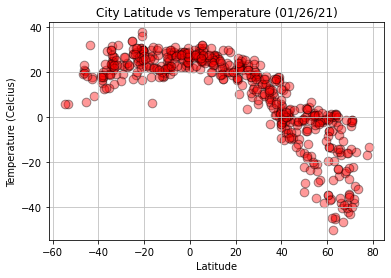

In [11]:
plt.figure(figsize = (6, 4))
plt.scatter(city_weather_df['Lat'], city_weather_df['Max Temp'], s=75, c="red", edgecolors='black', alpha=0.4)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celcius)")

#save the plot
plt.savefig('..\output_data\lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

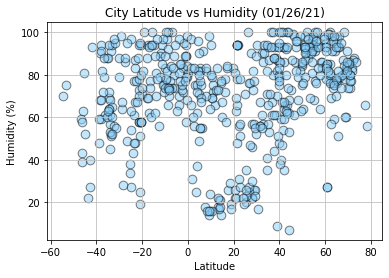

In [12]:
plt.figure(figsize = (6, 4))
plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], s=75, c="lightskyblue", edgecolors='black', alpha=0.5)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save the plot
plt.savefig('..\output_data\lat_v_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

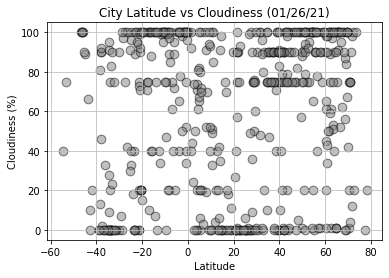

In [13]:
plt.figure(figsize = (6, 4))
plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], s=75, c="grey", edgecolors='black', alpha=0.5)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the plot
plt.savefig('..\output_data\lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

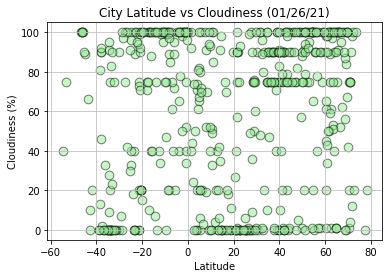

In [14]:
plt.figure(figsize = (6, 4))
plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], s=75, c="lightgreen", edgecolors='black', alpha=0.5)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the plot
plt.savefig('..\output_data\lat_v_wind.png')
plt.show()

## Linear Regression

In [15]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on hemispheres
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] >= 0)]
southern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7370606773199726


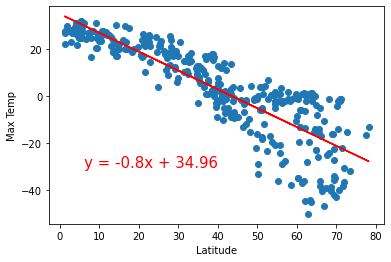

In [16]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,-30))


In [17]:
# As epected the high r value indicates a strong positive correlation between latitude and max temperature in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1679817049932197


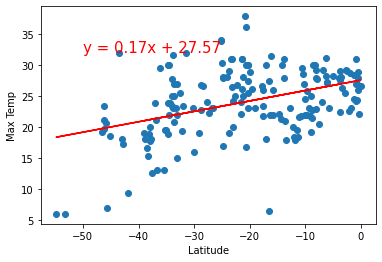

In [18]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-50,32))


In [19]:
# Surprisingly low r value indicates a weak positive correlation between latitude and max temperature in the southern hemisphere. This maybe due to less data points are available, as there is a smaller volume of land in the lower half of the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16738395831935435


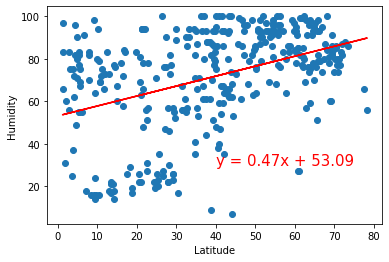

In [20]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,30))


In [21]:
# The low r values indicate a weak to no relationship between humidity and latitude in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13472265630490834


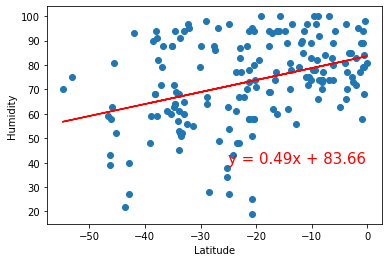

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25,40))


In [23]:
# The low r values indicate a weak to no relationship between humidity and latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07987964036938265


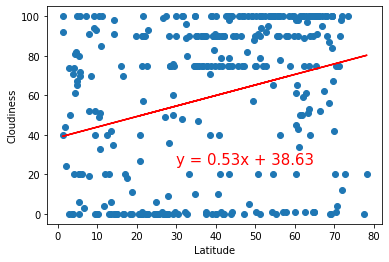

In [24]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (30,25))


In [25]:
# The low r values indicate a weak to no relationship between cloudiness and latitude in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1346500842285782


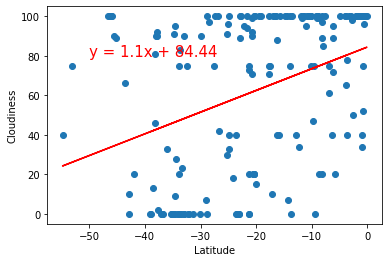

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-50,80))


In [27]:
# The low r values indicate a weak to no relationship between cloudiness and latitude in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005220648790709771


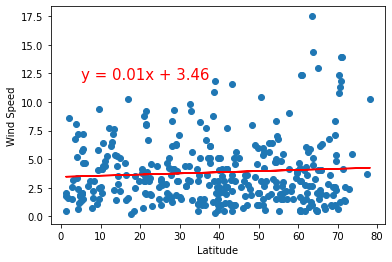

In [28]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (5,12))


In [29]:
# The low r values indicate a weak to no relationship between wind and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10384931014740649


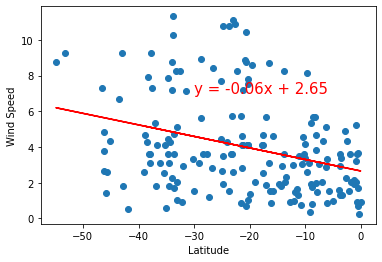

In [30]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,7))


In [31]:
# The low r values indicate a weak to no relationship between wind and latitude in the southern hemisphere